# Building polynomial regression model

### 1. Import open-source python libraries etc.

In [1]:
import pandas as pd
import numpy as np
import os
import time
from azure.storage.blob import BlockBlobService, ContentSettings # if there is an error, enter the following command in the terminal:
                                           # pip freeze
                                           # pip install azure-storage==0.20.0
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### 2. Import data from personal blob storage account in Azure

In [2]:
# CONTAINERNAME = 'xxxx'
# STORAGEACCOUNTNAME = 'xxxx'
# STORAGEACCOUNTKEY = 'xxxx'
# BLOBNAME = 'xxxx'
# localfilename = 'xxxx'
# LOCALDIRECTORY = os.getcwd()
# LOCALFILE =  os.path.join(LOCALDIRECTORY, localfilename)

CONTAINERNAME = 'population-dataset'
STORAGEACCOUNTNAME = 'alvinmlcrsf6983556517'
STORAGEACCOUNTKEY = 'H2vFRPo/aL9Tzk716PisEsfvOLA0l2dqYeI2SgaZ7XVqbc1m9qusnrgj7zLdPJyHneiMXkkfBz5MB0ZACbs2yQ=='
BLOBNAME = 'population.csv'
localfilename = 'population.csv'
LOCALDIRECTORY = os.getcwd()
LOCALFILE =  os.path.join(LOCALDIRECTORY, localfilename)

#download from blob
t1 = round(time.time(),3)
blob_service = BlockBlobService(account_name=STORAGEACCOUNTNAME,account_key=STORAGEACCOUNTKEY)
blob_service.get_blob_to_path(CONTAINERNAME,BLOBNAME,LOCALFILE)
t2 = round(time.time(),3)
print(("It takes %s seconds to download "+ BLOBNAME) % round((t2 - t1),3))

#unzipping downloaded files if needed
#with zipfile.ZipFile(ZIPPEDLOCALFILE, "r") as z:
#    z.extractall(LOCALDIRECTORY)

raw_data = pd.read_csv(LOCALFILE, encoding='cp1252')
# raw_data

It takes 0.315 seconds to download population.csv


### 3. Displaying data

In [3]:
raw_data.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,1.178154e+08,1.193987e+08,1.215153e+08,1.241500e+08,1.268056e+08,1.295275e+08,1.323946e+08,1.352566e+08,1.381695e+08,1.412246e+08,...,2.701044e+08,2.736129e+08,2.771430e+08,2.806617e+08,2.853395e+08,2.890142e+08,2.927178e+08,2.964305e+08,3.001647e+08,3.038948e+08
std,3.718574e+08,3.763198e+08,3.828766e+08,3.914229e+08,4.000141e+08,4.088431e+08,4.182402e+08,4.275910e+08,4.371472e+08,4.471854e+08,...,8.590759e+08,8.695747e+08,8.801411e+08,8.907482e+08,9.031121e+08,9.140650e+08,9.250832e+08,9.361120e+08,9.471972e+08,9.582705e+08
min,4.279000e+03,4.453000e+03,4.566000e+03,4.656000e+03,4.748000e+03,4.841000e+03,4.936000e+03,5.033000e+03,5.161000e+03,5.303000e+03,...,9.947000e+03,9.945000e+03,1.002500e+04,1.005700e+04,1.027900e+04,1.081900e+04,1.090800e+04,1.100100e+04,1.109700e+04,1.119200e+04
25%,5.184015e+05,5.301480e+05,5.426568e+05,5.559520e+05,5.684168e+05,5.727790e+05,5.786500e+05,5.882328e+05,6.257960e+05,6.567582e+05,...,1.363216e+06,1.425982e+06,1.443678e+06,1.465471e+06,1.415726e+06,1.431560e+06,1.447306e+06,1.471523e+06,1.522803e+06,1.577113e+06
50%,3.669524e+06,3.734206e+06,3.839584e+06,3.955168e+06,4.074411e+06,4.170862e+06,4.235562e+06,4.300502e+06,4.367325e+06,4.449014e+06,...,9.219637e+06,9.298515e+06,9.378126e+06,9.460802e+06,9.624267e+06,9.746730e+06,9.879129e+06,1.002115e+07,1.012427e+07,1.018073e+07
75%,2.532754e+07,2.611541e+07,2.690508e+07,2.770050e+07,2.847884e+07,2.924750e+07,2.999693e+07,3.059503e+07,3.120239e+07,3.179527e+07,...,4.994594e+07,5.038575e+07,5.087028e+07,5.140827e+07,5.249529e+07,5.318760e+07,5.396340e+07,5.493841e+07,5.590466e+07,5.716180e+07
max,3.032160e+09,3.073369e+09,3.126510e+09,3.191786e+09,3.257460e+09,3.324545e+09,3.394784e+09,3.464689e+09,3.535355e+09,3.610179e+09,...,6.766297e+09,6.849569e+09,6.932870e+09,7.014984e+09,7.099558e+09,7.185138e+09,7.271323e+09,7.357559e+09,7.444157e+09,7.530360e+09


In [4]:
raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [5]:
raw_data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


### 4. Pre-processing of raw dataset 

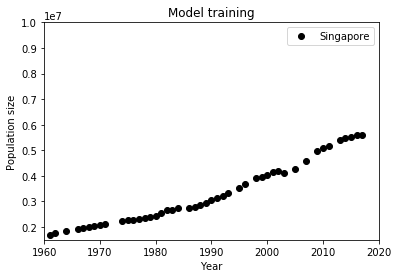

In [6]:
start_year = 1960
end_year = 2017
diff_year = end_year - start_year
year_list = []
for i in range(diff_year+1):
    year = start_year + i
    year_list.append(year)
# print(year_list)
# print('')

dummy_index = 0
country_name = 'Singapore'
for i in range (len(raw_data)):
    if raw_data['Country Name'][i] == country_name:
        dummy_index = i
raw_data_extracted = [raw_data[str(year_list[i])][dummy_index] for i in range(len(year_list))]
# print(raw_data_extracted)
# title_1 = 'Year - ' + str(country_name)
# title_2 = 'Population size - ' + str(country_name)
# data_table = pd.DataFrame(columns=[title_1, title_2])
# data_table[title_1] = year_list
# data_table[title_2] = raw_data_extracted
# data_table

# transform data in array format and reshape to be fed into the model
x_train, x_test, y_train, y_test = train_test_split(year_list,
                                                    raw_data_extracted,
                                                    test_size = 0.2,
                                                    random_state = 42)
x_train_array = (np.array(x_train))
X_train = x_train_array.reshape(len(x_train),-1)
y_train_array = (np.array(y_train))
Y_train = y_train_array.reshape(len(y_train),-1)
x_test_array = (np.array(x_test))
X_test = x_test_array.reshape(len(x_test),-1)
y_test_array = (np.array(y_test))
Y_test = y_test_array.reshape(len(y_test),-1)

# print(X_train)
# print('')
# print(Y_train)
# print('')
# print(X_test)
# print('')
# print(Y_test)
# print('')

# plotting of training dataset
graph = plt.plot(X_train,Y_train,'o', label = str(country_name),color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model training')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.axis([1960, 2020, 1.5*10e5, 10e6])
plt.show()

### 5. Model training and validation

The r^2 value is 0.993.

The average error for the validation step is 2.79%.



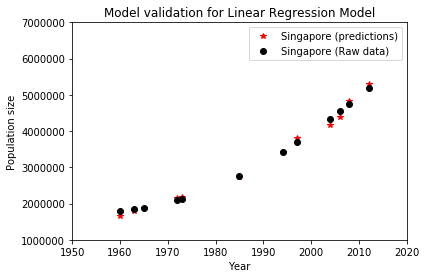

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.844795e-19
  overwrite_a=True).T


The r^2 value is 0.994.

The average error for the validation step is 2.52%.



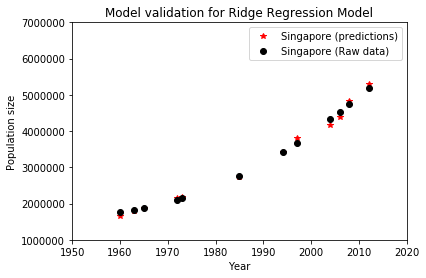

In [7]:
# Using Batch Gradient Descent to train model
name = 'june6results_polynomialregression'
os.mkdir(name)
linear_model_GD = LinearRegression() 
degree_value = 3
poly_model = PolynomialFeatures(degree=degree_value, include_bias=False)
X_poly_train = poly_model.fit_transform(X_train)
model_train_GD = linear_model_GD.fit(X_poly_train,Y_train)
m = model_train_GD.coef_
c = model_train_GD.intercept_

# Validating trained model
X_poly_test = poly_model.fit_transform(X_test)
y_pred = model_train_GD.predict(X_poly_test)

# compute accuracy of model
r2_value = r2_score(y_pred,y_test)
# mse = mean_squared_error(y_pred,y_test)
# mae = mean_absolute_error(y_pred,y_test)
# rmse = sqrt(mse)
print('The r^2 value is ' + str(round(r2_value,3)) + '.')
print('')
total_error = 0
avg_error = 0
for i in range(len(y_pred)):
    total_error += (abs(y_pred[i]-y_test[i])/min(y_pred[i],y_test[i]))
avg_error = (total_error/len(y_pred)) * 100
print('The average error for the validation step is ' + str(round(float(avg_error),2)) + '%' + '.')
print('')

# exporting of data into DataFrame format
title_1 = 'Year - ' + str(country_name)
title_2 = 'Actual population size - ' + str(country_name)
title_3 = 'Predicted population size - ' + str(country_name)
data_table_linear_reg = pd.DataFrame(columns=[title_1, title_2, title_3])
data_table_linear_reg[title_1] = x_test
data_table_linear_reg[title_2] = y_test
data_table_linear_reg[title_3] = [y_pred[i][0] for i in range(len(y_pred))]
data_table_linear_reg.to_csv('june6results_polynomialregression/poly_reg.csv')

# plotting of graph
graph1 = plt.plot(x_test,y_test,'*', label = str(country_name) + " " + '(predictions)',color = 'r')
graph2 = plt.plot(x_test,y_pred,'o', label = str(country_name) + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model validation for Linear Regression Model')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.axis([1950, 2020, 0.1*10e6, 0.7*10e6])
plt.show()


# Using Ridge Regression to train model
from sklearn.linear_model import Ridge
ridge_reg_model = Ridge(alpha = 1, solver = 'cholesky')
degree_value = 3
poly_model = PolynomialFeatures(degree=degree_value, include_bias=False)
X_poly_train = poly_model.fit_transform(X_train)
ridge_reg_model.fit(X_poly_train,Y_train)
m = ridge_reg_model.coef_
c = ridge_reg_model.intercept_

# Validating trained model
X_poly_test = poly_model.fit_transform(X_test)
y_pred_ridge = ridge_reg_model.predict(X_poly_test)

# compute accuracy of model
r2_value_ridge = r2_score(y_pred_ridge,y_test)
# mse = mean_squared_error(y_pred,y_test)
# mae = mean_absolute_error(y_pred,y_test)
# rmse = sqrt(mse)
print('The r^2 value is ' + str(round(r2_value_ridge,3)) + '.')
print('')
total_error = 0
avg_error = 0
for i in range(len(y_pred_ridge)):
    total_error += (abs(y_pred_ridge[i]-y_test[i])/min(y_pred_ridge[i],y_test[i]))
avg_error = (total_error/len(y_pred_ridge)) * 100
print('The average error for the validation step is ' + str(round(float(avg_error),2)) + '%' + '.')
print('')

# exporting of data into DataFrame format
title_1 = 'Year - ' + str(country_name)
title_2 = 'Actual population size - ' + str(country_name)
title_3 = 'Predicted population size - ' + str(country_name)
data_table_ridge_reg = pd.DataFrame(columns=[title_1, title_2, title_3])
data_table_ridge_reg[title_1] = x_test
data_table_ridge_reg[title_2] = y_test
data_table_ridge_reg[title_3] = [y_pred_ridge[i][0] for i in range(len(y_pred_ridge))]
data_table_ridge_reg.to_csv('june6results_polynomialregression/poly_ridge_reg.csv')

# plotting of graph
graph1 = plt.plot(x_test,y_test,'*', label = str(country_name) + " " + '(predictions)',color = 'r')
graph2 = plt.plot(x_test,y_pred_ridge,'o', label = str(country_name) + " "+ '(Raw data)',color = 'k')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model validation for Ridge Regression Model')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=1.5)
plt.axis([1950, 2020, 0.1*10e6, 0.7*10e6])
plt.show()

### 6. Exporting predictions dataset to blob storage account in Azure

In [8]:
from azure.storage.blob import BlockBlobService, ContentSettings, PublicAccess

block_blob_service = BlockBlobService(account_name = STORAGEACCOUNTNAME, account_key=STORAGEACCOUNTKEY)
results_container = 'june6-results'
block_blob_service.create_container(results_container)
block_blob_service.set_container_acl(results_container, public_access=PublicAccess.Container)

In [12]:
#Upload the CSV file to Azure cloud
path = name
for filename in os.listdir(path):
    block_blob_service.create_blob_from_path(results_container,
                                             str(name) + "/" + str(filename),
                                             str(name) + "/" + str(filename),
                                             content_settings=ContentSettings(content_type='application/CSV')
                                             )